In [32]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import accuracy_score

In [33]:
df = pd.read_csv('/IMDB Dataset.csv')  # Replace with your actual file path
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [34]:

    # Preprocess the dataset
    def preprocess_text(text):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = ''.join([char for char in text if char.isalnum() or char.isspace()])
        return text

    df['review'] = df['review'].apply(preprocess_text)


In [35]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'].values)
X = tokenizer.texts_to_sequences(df['review'].values)
X = pad_sequences(X, maxlen=500)

In [36]:
y = pd.get_dummies(df['sentiment']).values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=500))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [40]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test), verbose=2)

Epoch 1/3
625/625 - 963s - loss: 0.3904 - accuracy: 0.8234 - val_loss: 0.2887 - val_accuracy: 0.8830 - 963s/epoch - 2s/step
Epoch 2/3
625/625 - 913s - loss: 0.2759 - accuracy: 0.8908 - val_loss: 0.2795 - val_accuracy: 0.8891 - 913s/epoch - 1s/step
Epoch 3/3
625/625 - 926s - loss: 0.2354 - accuracy: 0.9082 - val_loss: 0.2715 - val_accuracy: 0.8910 - 926s/epoch - 1s/step


In [43]:
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_test_classes = [np.argmax(element) for element in y_test]

313/313 [==============================] - 56s 180ms/step


In [45]:
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

Accuracy: 0.891


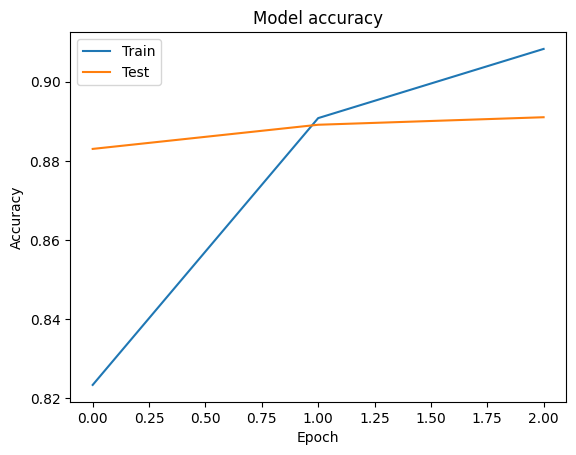

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

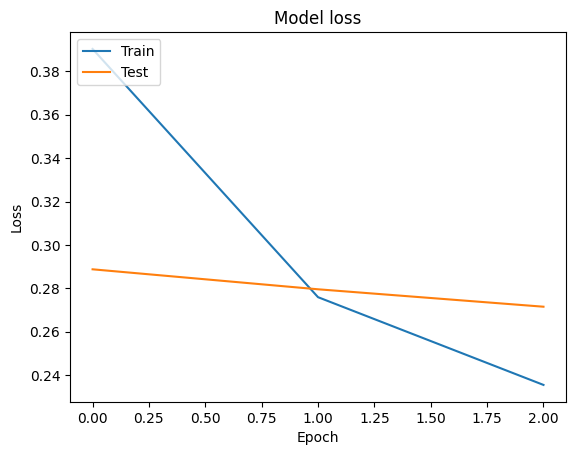

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()